<a href="https://colab.research.google.com/github/easyforitall/CUSTOMER-CHURN-PREDICTION-USING-DEEPLEARNING-ANN-/blob/main/CUSTOMER_CHURN_PREDICTION_USING_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [ ]:
!jupyter --version

jupyter core     : 4.6.3
jupyter-notebook : 6.1.4
qtconsole        : 4.7.7
ipython          : 7.19.0
ipykernel        : 5.3.4
jupyter client   : 6.1.7
jupyter lab      : 2.2.6
nbconvert        : 6.0.7
ipywidgets       : 7.5.1
nbformat         : 5.0.8
traitlets        : 5.0.5


In [ ]:
pd.show_versions()


INSTALLED VERSIONS
------------------
commit           : db08276bc116c438d3fdee492026f8223584c477
python           : 3.8.5.final.0
python-bits      : 64
OS               : Windows
OS-release       : 10
Version          : 10.0.19041
machine          : AMD64
processor        : Intel64 Family 6 Model 142 Stepping 12, GenuineIntel
byteorder        : little
LC_ALL           : None
LANG             : None
LOCALE           : English_United States.1252

pandas           : 1.1.3
numpy            : 1.23.3
pytz             : 2020.1
dateutil         : 2.8.1
pip              : 20.2.4
setuptools       : 50.3.1.post20201107
Cython           : 0.29.28
pytest           : 6.1.1
hypothesis       : None
sphinx           : 3.2.1
blosc            : None
feather          : None
xlsxwriter       : 1.3.7
lxml.etree       : 4.6.1
html5lib         : 1.1
pymysql          : None
psycopg2         : None
jinja2           : 2.11.2
IPython          : 7.19.0
pandas_datareader: None
bs4              : 4.9.3
bottleneck 

In [ ]:
import os
os.chdir("c:\\Users\\43720\\OneDrive - ITC INFOTECH INDIA LIMITED\\Desktop\\pandas")

In [ ]:
pd.set_option("display.max_rows",7045)
pd.set_option("display.max_columns",22)

In [ ]:
data=pd.read_csv("Telco-Customer-Churn.csv")
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# DATA EXPLORATION

In [ ]:
data.shape

(7043, 21)

In [ ]:
data.drop('customerID',axis='columns',inplace=True)

In [ ]:
data.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [ ]:
# converting into numeric column
pd.to_numeric(data.TotalCharges)

ValueError: Unable to parse string " " at position 488

In [ ]:
pd.to_numeric(data.TotalCharges,errors='coerce').isnull().value_counts()

In [ ]:
data[pd.to_numeric(data.TotalCharges,errors='coerce').isnull()]

In [ ]:
data.dropna(axis=0,inplace=True)

In [ ]:
data.isnull().sum()

In [ ]:
df1 = data[data['TotalCharges']!=" "]
df1.shape

In [ ]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)

In [ ]:
df1.TotalCharges.dtypes

VISUALIZATION

In [ ]:
# for tenure column
tenure_no = df1[df1.Churn=="No"].tenure
tenure_yes = df1[df1.Churn=="Yes"].tenure
plt.hist([tenure_yes,tenure_no],color = ['green','red'],label=['churn=yes','churn=No'])
plt.xlabel("tenure")
plt.ylabel("Number of customers")
plt.title("customer churn prediction visualization")
plt.legend()

In [ ]:
# monthly charges
monthlycharges_no = df1[df1.Churn=="No"].MonthlyCharges
monthlycharges_yes = df1[df1.Churn=="Yes"].MonthlyCharges
plt.hist([monthlycharges_yes,monthlycharges_no],color = ['green','red'],label=['churn=yes','churn=No'])
plt.xlabel("Monthlycharges")
plt.ylabel("Number of customers")
plt.title("customer churn prediction visualization")
plt.legend()

ENCODING

In [ ]:
for column in df1:
    print(f'{column}:{df1[column].unique()}')

In [ ]:
# object columns
def print_unqiue_col_values(a):
    for column in df1:
        if df1[column].dtypes=="object":
            print(f'{column}:{df1[column].unique()}')

In [ ]:
print_unqiue_col_values(df1)

In [ ]:
df1.replace("No internet service",'No',inplace=True)
df1.replace("No phone service","No",inplace=True)

In [ ]:
print_unqiue_col_values(df1)

In [ ]:
yes_no_colums = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection',
                "TechSupport","StreamingTV","StreamingMovies","PaperlessBilling",'Churn']

In [ ]:
for col in yes_no_colums:
    df1[col].replace({"Yes":1,"No":0},inplace=True)

In [ ]:
for col in df1:
    print(f'{col}:{df1[col].unique()}')

gender:['Female' 'Male']
SeniorCitizen:[0 1]
Partner:[1 0]
Dependents:[0 1]
tenure:[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService:[0 1]
MultipleLines:[0 1]
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:[0 1]
OnlineBackup:[1 0]
DeviceProtection:[0 1]
TechSupport:[0 1]
StreamingTV:[0 1]
StreamingMovies:[0 1]
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:[1 0]
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges:[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges:[  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn:[0 1]


In [ ]:
df1['gender'].replace({'Female':1,"Male":0},inplace=True)

In [ ]:
df2 = pd.get_dummies(data=df1,columns=['InternetService',"Contract",'PaymentMethod'])
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [ ]:
df2.sample(4)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5686,0,1,0,0,6,1,0,1,0,0,0,...,1,0,1,0,1,0,0,1,0,0,0
3236,0,0,0,0,16,1,1,0,1,0,0,...,0,1,0,0,1,0,0,0,0,1,0
4502,0,0,0,0,55,1,1,0,0,0,0,...,1,0,1,0,1,0,0,0,0,1,0
3112,0,0,1,0,72,1,1,1,1,0,1,...,0,0,1,0,0,0,1,1,0,0,0


In [ ]:
df2.shape

(7032, 27)

In [ ]:
pd.set_option("display.max_columns",7034)
pd.set_option("display.max_rows",28)

In [ ]:
df2.sample(4)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
3248,0,1,1,0,10,1,1,0,0,0,0,0,1,1,86.65,856.65,1,0,1,0,1,0,0,0,0,1,0
2704,1,0,1,1,53,1,0,0,0,1,0,0,1,0,60.60,3297.00,0,1,0,0,0,1,0,0,1,0,0
2000,1,1,0,0,9,1,0,0,0,1,0,0,0,0,75.50,637.40,0,0,1,0,1,0,0,0,1,0,0
2348,0,0,1,1,61,0,0,1,0,1,0,0,0,0,33.60,2117.20,0,1,0,0,1,0,0,1,0,0,0


SCALING

In [ ]:
# Scaling of data
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

In [ ]:
df2.sample(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
1413,0,0,1,1,0.901408,1,1,1,1,1,1,0,0,0,0.759204,0.699279,0,0,1,0,0,0,1,0,1,0,0
4325,0,0,0,0,0.000000,1,0,0,0,0,0,0,0,0,0.024876,0.000225,0,0,0,1,1,0,0,0,1,0,0
6697,1,0,0,0,0.408451,1,1,1,0,1,0,1,1,1,0.607463,0.277902,0,1,0,0,0,1,0,0,1,0,0


SPLITTING

In [ ]:
X = df2.drop('Churn',axis=1)
y = df2["Churn"]

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=5)

In [ ]:
X_train.shape

(5625, 26)

In [ ]:
y_train.shape

(5625,)

In [ ]:
X_test.shape

(1407, 26)

MODEL IMPLEMENTATION

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(20,input_shape=(26,),activation='relu'), #input layer with hidden layer
    keras.layers.Dense(1,activation='sigmoid')#output layer
])
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(X_train,y_train,epochs = 100)

EVALUATING THE MODEL

In [ ]:
model.evaluate(X_test,y_test)

44/44 [==============================] - 2s 11ms/step - loss: 0.4596 - accuracy: 0.7733


[0.45960110425949097, 0.7732764482498169]

In [ ]:
yp = model.predict(X_test)
yp[:5]

44/44 [==============================] - 1s 10ms/step


array([[0.16181767],
       [0.39367512],
       [0.02380025],
       [0.70299524],
       [0.4420183 ]], dtype=float32)

In [ ]:
y_test[:5]

2660    0
744     0
5579    1
64      1
3287    1
Name: Churn, dtype: int64

In [ ]:
y_pred = []
for i in yp:
    if i>0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [ ]:
y_pred[:5]

[0, 0, 0, 1, 0]

CONFUSION & CLASSIFICATION REPORT

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.91      0.85       999
           1       0.66      0.44      0.53       408

    accuracy                           0.77      1407
   macro avg       0.73      0.68      0.69      1407
weighted avg       0.76      0.77      0.76      1407



In [ ]:
df1['Churn'].value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

Text(69.0, 0.5, 'Truth')

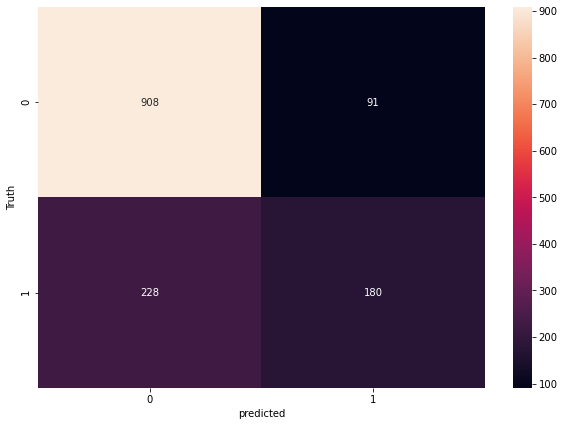

In [ ]:
import seaborn as sns
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel("predicted")
plt.ylabel("Truth")